In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-analyst-job-postings-google-search/gsearch_jobs.csv

In [2]:
import pandas as pd
import numpy as np
data_analyst = pd.read_csv('gsearch_jobs.csv')
DA = data_analyst
DA.head()

,Unnamed: 0,index,title,company_name,location,via,Unnamed: 6,extensions,job_id,thumbnail,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,0,Data Analyst,Chloeta,"Oklahoma City, OK",via ZipRecruiter,NaN,"['21 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['python', 'r']"
1,1,1,Junior Data Analyst/Scientist Role - Contract ...,Upwork,Anywhere,via Upwork,NaN,"['17 hours ago', 'Work from home', 'Contractor...",eyJqb2JfdGl0bGUiOiJKdW5pb3IgRGF0YSBBbmFseXN0L1...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['r', 'postgresql', 'pandas', 'mysql', 'mongod..."
2,2,2,Data Analyst,ATC,United States,via LinkedIn,NaN,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
3,3,3,Data Analyst,Guidehouse,"Topeka, KS",via Nexxt,NaN,"['10 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['tableau', 'word', 'power_bi', 'python', 'per..."
4,4,4,Data Analyst,AnMed Health LLC,Anywhere,via LinkedIn,NaN,"['18 hours ago', 'Work from home', 'Part-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]


In [3]:
print(DA.shape)

(28375, 27)


In [4]:
# Let's exploring all the attributes
DA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28375 entries, 0 to 28374
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           28375 non-null  int64  
 1   index                28375 non-null  int64  
 2   title                28375 non-null  object 
 3   company_name         28375 non-null  object 
 4   location             28356 non-null  object 
 5   via                  28366 non-null  object 
 6   Unnamed: 6           0 non-null      float64
 7   extensions           28375 non-null  object 
 8   job_id               28375 non-null  object 
 9   thumbnail            15329 non-null  object 
 10  posted_at            28375 non-null  object 
 11  schedule_type        28198 non-null  object 
 12  work_from_home       12362 non-null  object 
 13  salary               5120 non-null   object 
 14  search_term          28375 non-null  object 
 15  date_time            28375 non-null 

In [5]:
# Now, we're about to explore all missing values
print(DA.isna().sum())

Unnamed: 0                 0
index                      0
title                      0
company_name               0
location                  19
via                        9
Unnamed: 6             28375
extensions                 0
job_id                     0
thumbnail              13046
posted_at                  0
schedule_type            177
work_from_home         16013
salary                 23255
search_term                0
date_time                  0
search_location            0
commute_time           28375
salary_pay             23255
salary_rate            23255
salary_avg             23255
salary_min             23557
salary_max             23557
salary_hourly          25166
salary_yearly          26473
salary_standardized    23255
description_tokens         0
dtype: int64


In [6]:
# Statistical Analysis of Salaries
DA_salary_stats = DA[['salary_min', 'salary_avg', 'salary_hourly', 'salary_max']].dropna().describe()
print(DA_salary_stats)

        salary_min   salary_avg  salary_hourly   salary_max
count  3007.000000  3007.000000    3007.000000  3007.000000
mean     31.337808    43.625431      43.625431    55.913053
std      19.394613    23.303888      23.303888    31.198079
min       8.000000     9.000000       9.000000    10.000000
25%      16.000000    27.500000      27.500000    35.000000
50%      25.000000    37.500000      37.500000    50.000000
75%      40.000000    57.500000      57.500000    75.000000
max     200.000000   300.000000     300.000000   500.000000


In [7]:
# Extracting & Counting the most posted Job titles  
DA_filtered = DA.filter(items=['title', 'salary_avg']).dropna()
DA_count_titles = DA_filtered['title'].value_counts().head(10)
DA_count_titles

title
Data Analyst                                  499
Sr. Data Analyst, Marketing Operations        257
Senior Data Analyst                            99
Senior Data Analyst, Business Optimization     92
Data Scientist                                 57
Business Data Analyst                          48
Lead-Data Analyst                              45
Data Analyst II                                45
Marketing Data Analyst                         30
Business Intelligence Analyst                  28
Name: count, dtype: int64

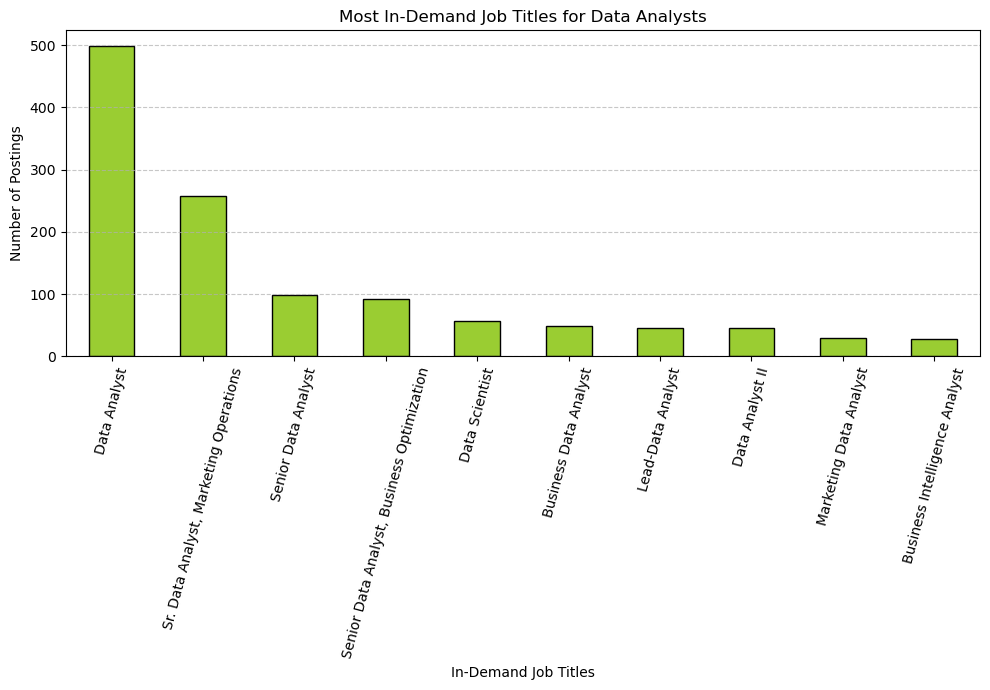

In [117]:
import matplotlib.pyplot as plt

# Bar Chart - Best 10 In-Demand Skills for Data Analyst, with the highest number of Job Postings
plt.figure(figsize=(10, 7))
DA_count_titles.plot(kind='bar', color='yellowgreen', edgecolor='black')
plt.title('Most In-Demand Job Titles for Data Analysts')
plt.xlabel('In-Demand Job Titles')
plt.ylabel('Number of Postings')
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [133]:
DA_filtered = DA.filter(items=['company_name', 'salary_avg']).dropna()
DA_filtered

# sorted_table = DA_filtered.sort_values(by='salary_avg', ascending=False)
# sorted_table.head(15)

DA_best_salaries = DA_filtered.drop_duplicates().sort_values(by='salary_avg', ascending=False)

# Display the sorted unique rows
DA_best_salaries.head(15)


,company_name,salary_avg
4047,Airtable,233500.0
14623,Claroty,232500.0
22203,TDA Creative,225000.0
9374,84.51°,221875.0
9840,Captivation Software,217500.0
1971,Mavent Analytics,215000.0
3860,Airtable,215000.0
9991,Airbnb,212500.0
10239,Carta,212000.0
7582,SoFi,205000.0


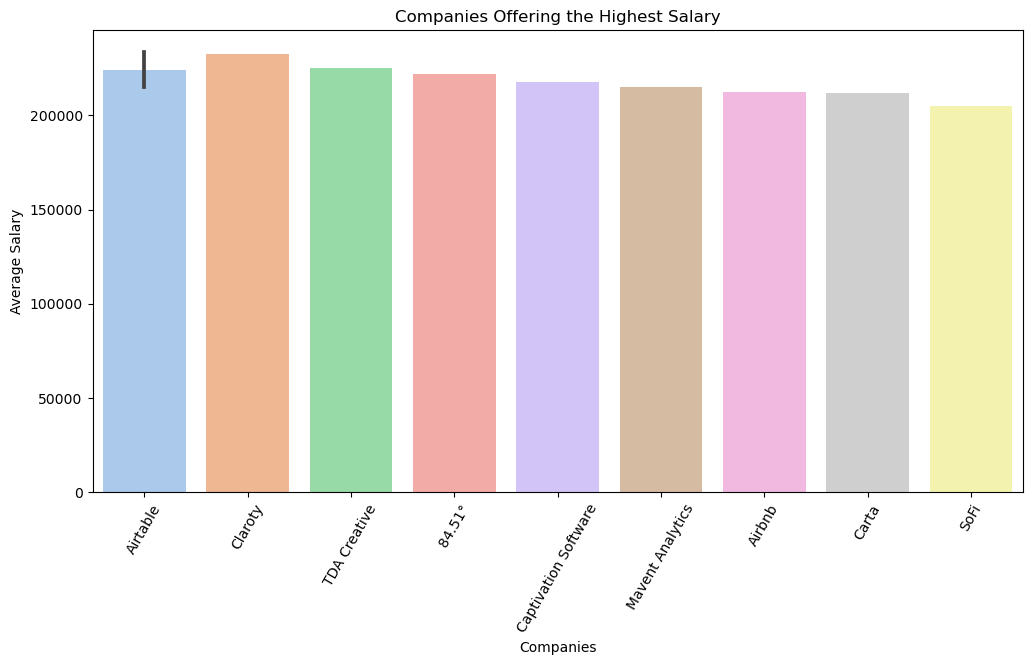

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar Chart: Displaying companies with the highest salaries for Data Analysts
plt.figure(figsize=(12, 6))
sns.barplot(x=DA_best_salaries['company_name'].head(10), y=DA_best_salaries['salary_avg'].head(10), palette='pastel')
plt.xlabel('Companies')
plt.ylabel('Average Salary')
plt.xticks(rotation=60)
plt.title('Companies Offering the Highest Salary')
plt.show()


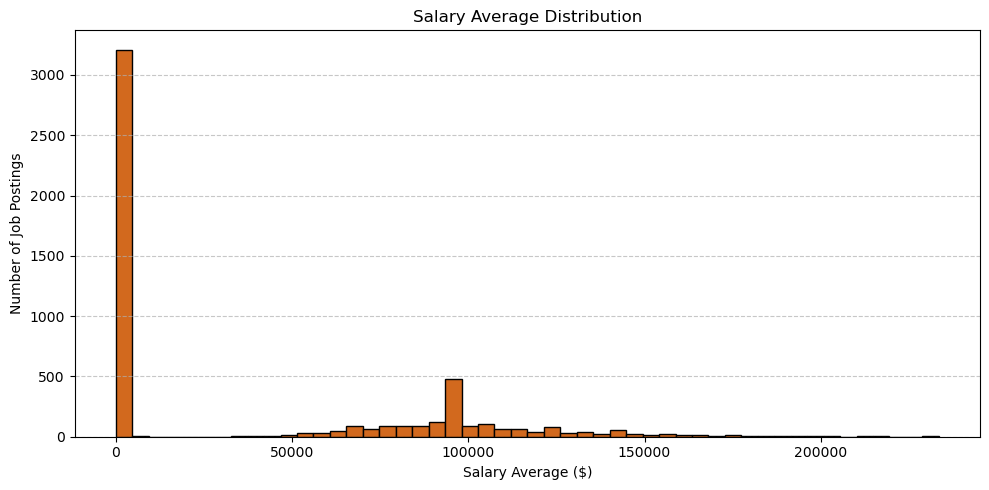

In [115]:
# Histogram: Distribution of average salaries
plt.figure(figsize=(10, 5))
plt.hist(DA_filtered['salary_avg'].dropna(), bins=50, color='chocolate', edgecolor='black')
plt.title('Salary Average Distribution')
plt.xlabel('Salary Average ($)')
plt.ylabel('Number of Job Postings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
# Exploring a list of the best 15 required skills set for Data Analysts
DA_skills = data_analyst['description_tokens'].dropna().explode()
DA_best_skills = (DA_skills.value_counts()).head(15)
DA_best_skills

# Excels & SQL are among the most required skills, accounting for about half all of skills set from job postings

description_tokens
[]                                                                         5850
['excel']                                                                   983
['sql']                                                                     954
['sql', 'excel']                                                            579
['tableau', 'microstrategy', 'sql', 'jira']                                 272
['power_bi', 'python']                                                      265
['tableau']                                                                 211
['go']                                                                      172
['tableau', 'sql']                                                          171
['power_bi']                                                                166
['powerpoint', 'excel']                                                     146
['r']                                                                       146
['python']           

In [72]:
skills = ["r", "sql", "excel", "python", "tableau", 
          "power_bi", "sas", "powerpoint", "word", 
          "azure", "aws", "looker", "spss", "alteryx",
          "sharepoint", "outlook","ssrs", "qlik", "matlab",
          "airflow", "postgresql","mongodb", "gdpr",  "gitlab", "nltk"]

# Extracting and counting the occurrences of each benefit
total_skills = {skill: DA['description_tokens'].apply(lambda x: skill in str(x)).sum() for skill in skills}

total_skills


{'r': 15728,
 'sql': 14837,
 'excel': 9656,
 'python': 8091,
 'tableau': 7925,
 'power_bi': 7394,
 'sas': 2638,
 'powerpoint': 2188,
 'word': 2172,
 'azure': 1592,
 'aws': 1578,
 'looker': 1272,
 'spss': 976,
 'alteryx': 887,
 'sharepoint': 714,
 'outlook': 703,
 'ssrs': 560,
 'qlik': 530,
 'matlab': 308,
 'airflow': 268,
 'postgresql': 250,
 'mongodb': 109,
 'gdpr': 70,
 'gitlab': 58,
 'nltk': 13}

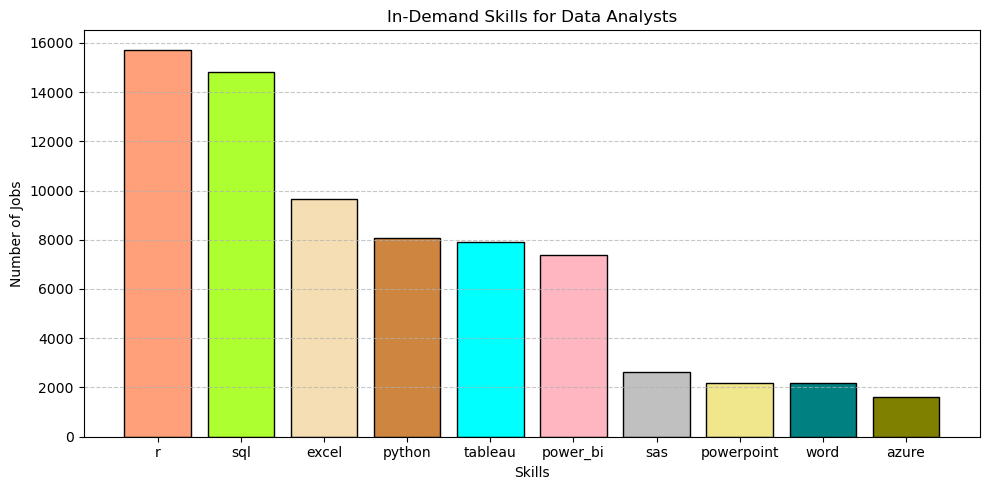

In [114]:
# Bar Chart: Job Benefits Distribution

skills = ["r", "sql", "excel", "python", "tableau", "power_bi", "sas", "powerpoint", "word", "azure"]

skill_values = [total_skills[skill] for skill in skills]

plt.figure(figsize=(10, 5))
plt.bar(skills, skill_values, color=['lightsalmon', 'greenyellow', 'wheat', 'peru', 'aqua', 'lightpink', 'silver', 'khaki', 'teal', 'olive'], edgecolor='black')
plt.title('In-Demand Skills for Data Analysts')
plt.xlabel('Skills')
plt.ylabel('Number of Jobs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [12]:
# Exploring a list of the best 15 platforms with the most job postings
DA_best_platforms = (data_analyst['via'].dropna().value_counts()).head(15)
DA_best_platforms

# As expected, LinkedIn has the highest job posting roles for Data Analysts

via
via LinkedIn             9008
via Upwork               4439
via BeBee                2481
via Trabajo.org          2157
via ZipRecruiter         1803
via Indeed               1334
via Snagajob              573
via Adzuna                534
via Jobs Trabajo.org      416
via Monster               335
via My ArkLaMiss Jobs     283
via Built In              252
via Jora                  231
via Nexxt                 201
via Recruit.net           195
Name: count, dtype: int64

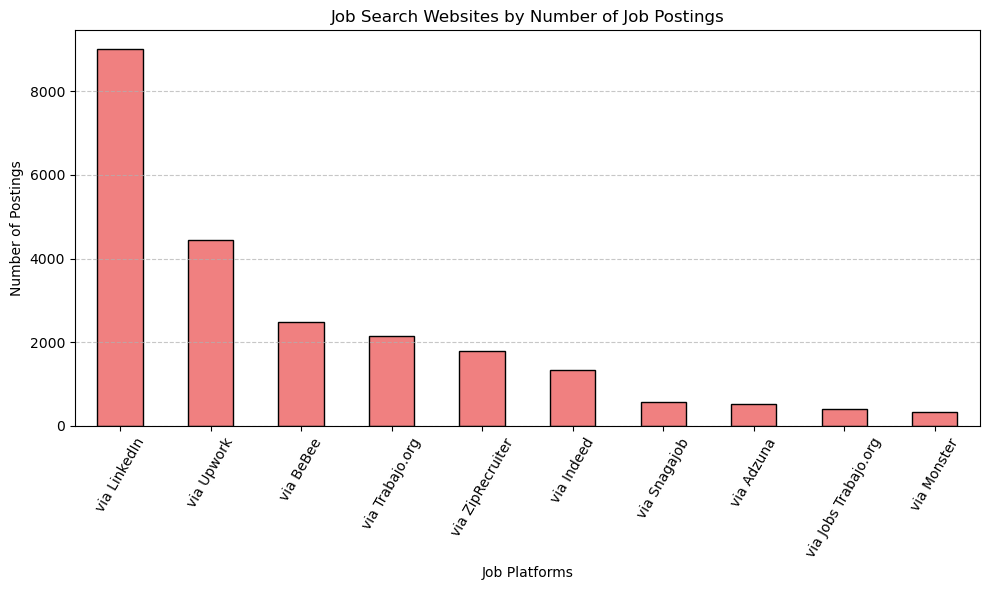

In [109]:
# Bar Chart - Best 10 platforms for Data Analysis Roles with the highest number of Job Postings
plt.figure(figsize=(10, 6))
DA_best_platforms.head(10).plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Job Search Websites by Number of Job Postings')
plt.xlabel('Job Platforms')
plt.ylabel('Number of Postings')
plt.xticks(rotation=60)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [14]:
# Exploring a list of the best 15 companies with the most jobs posting roles
DA_company = data_analyst['company_name'].dropna().value_counts()
DA_best_companies = DA_company.head(15)
DA_best_companies

# UPWORK has most OF job posting, and consists of nearly 60 percent of jobs from the list.

company_name
Upwork                              4459
Walmart                              966
EDWARD JONES                         730
Corporate                            610
Talentify.io                         563
Cox Communications                   517
Dice                                 275
Insight Global                       250
Staffigo Technical Services, LLC     167
Centene Corporation                  162
Jobot                                107
Elevance Health                      104
Harnham                               99
UnitedHealth Group                    90
State of Missouri                     89
Name: count, dtype: int64

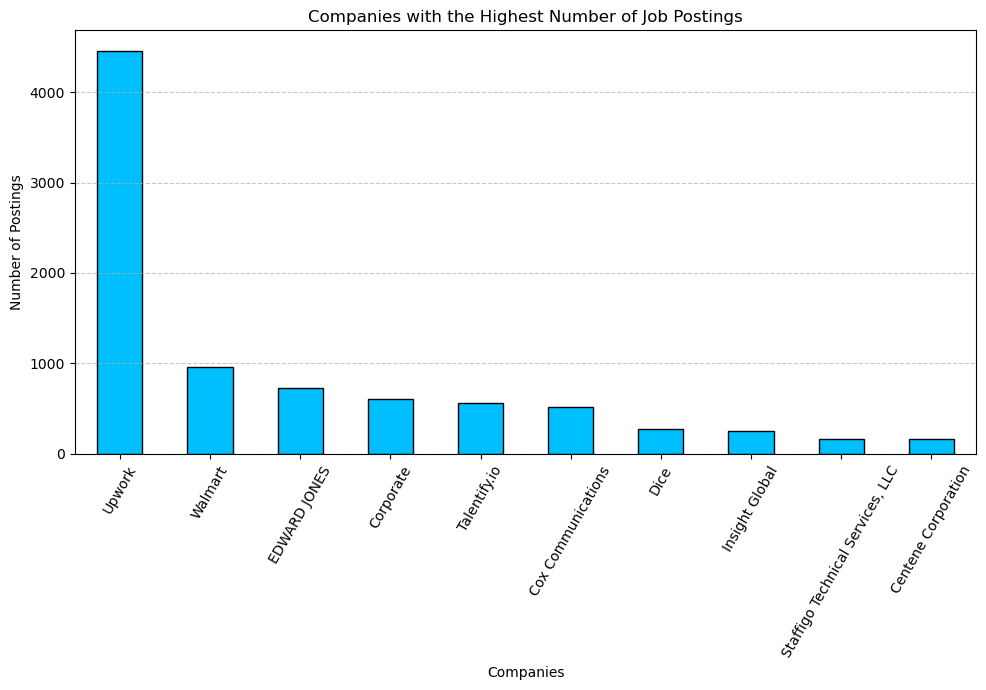

In [112]:
# Bar Chart - 10 Popular Role for Data Anlysts according to the number of Job Postings
plt.figure(figsize=(10, 7))
DA_best_companies.head(10).plot(kind='bar', color='deepskyblue', edgecolor='black')
plt.title('Companies with the Highest Number of Job Postings')
plt.xlabel('Companies')
plt.ylabel('Number of Postings')
plt.xticks(rotation=60)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

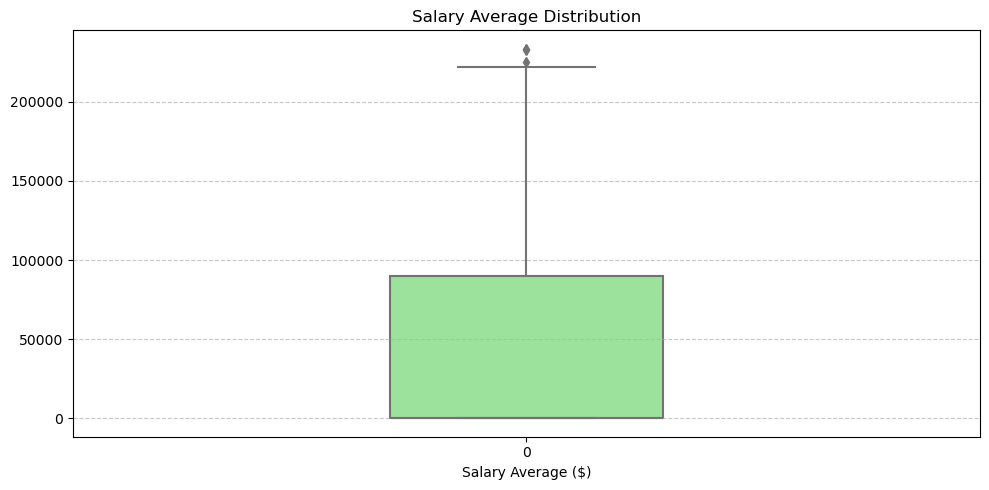

In [96]:
# Box Plot: Distribution of average salaries
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.boxplot(DA['salary_avg'], color='lightgreen', width=0.3)
plt.title('Salary Average Distribution')
plt.xlabel('Salary Average ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
# Extracting best Location to get a job as Data Analyst
location_counts = DA['location'].dropna().value_counts()
top_locations = location_counts.head(15)
top_locations

location
Anywhere                   7094
 Anywhere                  5268
  United States            3796
United States              3660
Kansas City, MO             528
  Oklahoma City, OK         458
  Kansas City, MO           440
Oklahoma City, OK           380
Jefferson City, MO          350
  Jefferson City, MO        305
  Bentonville, AR           250
Columbia, MO                211
Tulsa, OK                   200
  Tulsa, OK                 173
Wichita, KS                 159
Name: count, dtype: int64

In [18]:
# Separating States & Cities in Location column
def sep_state(location):
    if isinstance(location, str):
        # Splitting by comma and taking the last part (usually the state)
        portion = location.split(',')
        if len(portion) > 1:
            return portion[-1].strip()
    return None

DA['state'] = DA['location'].apply(sep_state)
state_counts = DA['state'].value_counts().head(10)
state_counts

state
MO    3221
OK    1839
KS    1673
AR    1441
CA     114
TX      37
MA      10
NE       2
PA       2
DC       2
Name: count, dtype: int64

In [19]:
# List of potential benefits to extract
benefits = ["Health insurance", "Dental insurance", "Paid time off", 
                 "Work from home", "Full-time", "No degree mentioned"]

# Extracting and counting the occurrences of each benefit
total_benefits = {benefit: DA['extensions'].apply(lambda x: benefit in str(x)).sum() for benefit in benefits}

total_benefits

{'Health insurance': 9907,
 'Dental insurance': 6354,
 'Paid time off': 6563,
 'Work from home': 12362,
 'Full-time': 21061,
 'No degree mentioned': 8412}

In [20]:
from itertools import combinations

# Extracting combinations of two benefits from the extensions column
def extract_benefit_combinations(extensions):
    present_benefits = [benefit for benefit in benefits if benefit in str(extensions)]
    return list(combinations(present_benefits, 5))

benefit_combinations = DA['extensions'].apply(extract_benefit_combinations).explode().dropna()

# Counting the occurrences of each benefit combination
benefit_combinations_counts = benefit_combinations.value_counts().head(20)
benefit_combinations_counts

extensions
(Health insurance, Dental insurance, Paid time off, Work from home, Full-time)              1536
(Health insurance, Dental insurance, Paid time off, Full-time, No degree mentioned)          670
(Health insurance, Paid time off, Work from home, Full-time, No degree mentioned)            390
(Health insurance, Dental insurance, Work from home, Full-time, No degree mentioned)         358
(Health insurance, Dental insurance, Paid time off, Work from home, No degree mentioned)     336
(Dental insurance, Paid time off, Work from home, Full-time, No degree mentioned)            318
Name: count, dtype: int64

In [42]:
# Filtering rows where the specific combination of benefits is offered
combined_benefits_df = DA[DA['extensions'].apply(lambda x: 
                                                 all(benefit in str(x) for benefit in 
                                                     ["Health insurance", "Dental insurance", "Paid time off", "Work from home", "Full-time", "No degree mentioned"]))]

# Counting the occurrences of companies offering the combination of benefits
top_companies_offering_benefits = combined_benefits_df['company_name'].value_counts().head(15)
top_companies_offering_benefits

company_name
Talentify.io                   16
RVO Health                     10
WEX                             8
Storm Search                    6
EquipmentShare                  5
Shelter Insurance Companies     5
Rhino                           4
Kajabi                          4
Alma                            4
Akkodis                         4
Intentsify                      4
Collectors                      4
Canopy Management LLC           3
Curology                        3
Allstate Insurance              3
Name: count, dtype: int64

In [22]:
# Counting the occurrences of states offering the combination of benefits
top_states_offering_benefits = combined_benefits_df['state'].value_counts().head()
top_states_offering_benefits

Series([], Name: count, dtype: int64)

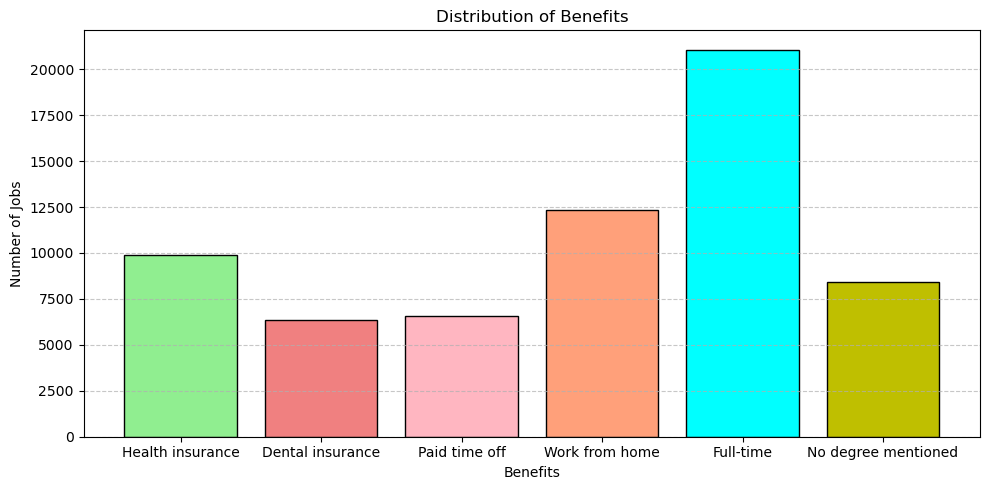

In [111]:
# Bar Chart: Job Benefits Distribution
benefits = ["Health insurance", "Dental insurance", "Paid time off", "Work from home", "Full-time", "No degree mentioned"]
benefits_values = [total_benefits[benefit] for benefit in benefits]

plt.figure(figsize=(10, 5))
plt.bar(benefits, benefits_values, color=['lightgreen', 'lightcoral', 'lightpink', 'lightsalmon', 'cyan', 'y'], edgecolor='black')
plt.title('Distribution of Benefits')
plt.xlabel('Benefits')
plt.ylabel('Number of Jobs')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


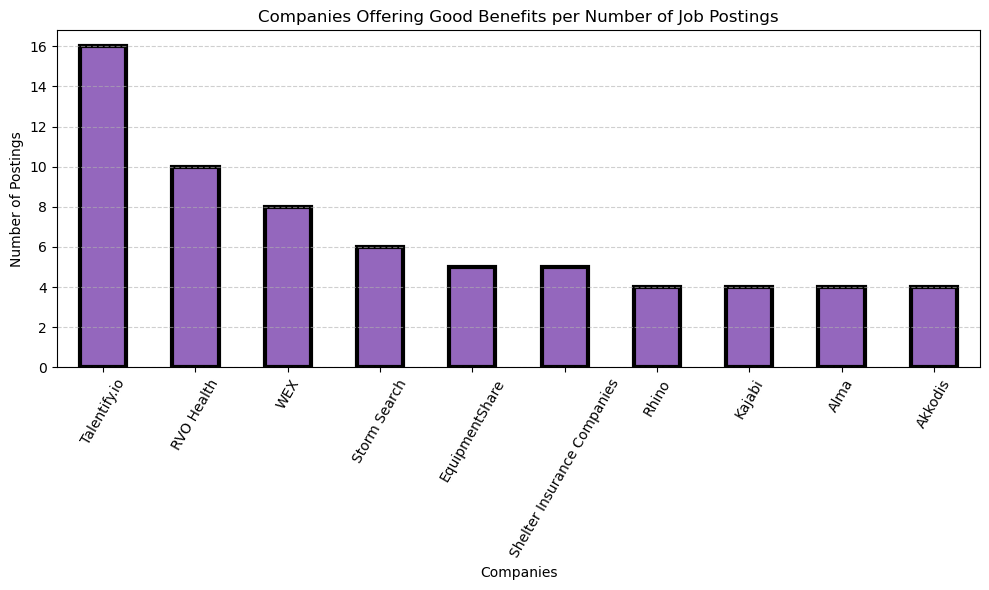

In [110]:
# Bar Chart - 10 Popular Role for Data Anlysts according to the number of Job Postings
plt.figure(figsize=(10, 6))
top_companies_offering_benefits.head(10).plot(kind='bar', color='tab:purple', edgecolor='black', lw=3)
plt.title('Companies Offering Good Benefits per Number of Job Postings')
plt.xlabel('Companies')
plt.ylabel('Number of Postings')
plt.xticks(rotation=60)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# These Companies offer a combination of 5 out of 6 benefits, which is great!. 
# Candidats are likelihood to choose one these companies because they're offering FIVE benifits!!!!

Thanks to **RAJAT RAJ** who inspired me